<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [28]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [60]:
products = pd.read_csv('/content/drive/MyDrive/4. Statistical NLP/Lab Assignment Internal/product_data.csv')
reviews = pd.read_csv('/content/drive/MyDrive/4. Statistical NLP/Lab Assignment Internal/reviews.csv')
# reading the data

In [30]:
print('The shape of products data is: ',products.shape)
print('The shape of reviews data is: ',reviews.shape)

The shape of products data is:  (720, 10)
The shape of reviews data is:  (67986, 8)


In [31]:
products.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
58,B00HE5834Y,Motorola,Motorola Droid Ultra XT1080 16GB 4G LTE Androi...,https://www.amazon.com/Motorola-XT1080-Android...,https://m.media-amazon.com/images/I/81p5bS9i6d...,3.5000000,https://www.amazon.com/product-reviews/B00HE5834Y,30,249.9900000,0.0000000
387,B07C8H8G4L,HUAWEI,Router Hotspot 4G LTE Unlocked GSM (LTE USA AT...,https://www.amazon.com/Hotspot-Unlocked-T-mobi...,https://m.media-amazon.com/images/I/31F-nzxA29...,3.5000000,https://www.amazon.com/product-reviews/B07C8H8G4L,48,78.9000000,0.0000000
213,B06XRN4RWL,Apple,"Apple iPhone 7 Plus, 128GB, Gold - For Sprint ...",https://www.amazon.com/Apple-iPhone-128GB-Unlo...,https://m.media-amazon.com/images/I/71NwKwSqSA...,3.8000000,https://www.amazon.com/product-reviews/B06XRN4RWL,28,304.9900000,0.0000000
438,B07GWFMLT8,Samsung,Samsung Galaxy Note 9 SM-N960F/DS 512GB/8GB (M...,https://www.amazon.com/Samsung-Galaxy-SM-N960F...,https://m.media-amazon.com/images/I/71BG9iPLRk...,4.8000000,https://www.amazon.com/product-reviews/B07GWFMLT8,18,677.0000000,0.0000000
710,B07ZGHYFZ4,Xiaomi,Xiaomi Mi Note 10 128GB 108MP Penta Camera 6.4...,https://www.amazon.com/Xiaomi-Factory-Unlocked...,https://m.media-amazon.com/images/I/81xsUqImP+...,5.0000000,https://www.amazon.com/product-reviews/B07ZGHYFZ4,3,486.5700000,514.8200000


In [32]:
reviews.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
6506,B00D35Z6OE,pamela pitre,5,"December 15, 2014",True,Great product. Even better price,Great product. Even better price. Thank you,nan
18694,B014GCG150,Pedro Luis,5,"May 23, 2017",True,"What I expected from the phone,","What I expected from the phone, well",nan
16836,B00ZE8HRYK,Amazon Customer,1,"December 10, 2016",True,It seems to be in good shape. We just received it,Update - I gave the phone to my daughter as a ...,1.0000000
32741,B06XS4978K,Keeandre,5,"March 22, 2018",True,Five Stars,it's a great phone.......love it. any chance g...,1.0000000
54788,B07JZRL7N5,Valente,4,"October 31, 2019",True,Happy,Yes good work good price good stuff thanks,nan


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [61]:
products.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [62]:
products = products.drop(columns=['url','image','reviewUrl'])
products.sample(5)

,asin,brand,title,rating,totalReviews,price,originalPrice
242,B071JP8XDJ,Sony,Sony Xperia XA1 Ultra G3223 32GB Unlocked GSM ...,3.6000000,313,299.0000000,0.0000000
60,B00HWEMZ1E,Nokia,"Nokia Lumia Icon, Black 32GB (Verizon Wireless)",3.8000000,159,233.7100000,0.0000000
161,B01J63O3KY,Samsung,"Samsung GS6 5.1"" Certified Pre-Owned Carrier L...",2.9000000,2,345.9200000,0.0000000
80,B00O2ALRNS,Samsung,Samsung Galaxy S4 SGH-I337 USA GSM Unlocked Ce...,2.8000000,175,154.9700000,0.0000000
8,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7000000,208,0.0000000,0.0000000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [63]:
products.dtypes
# checking data type of each column in products data

asin              object
brand             object
title             object
rating           float64
totalReviews       int64
price            float64
originalPrice    float64
dtype: object

In [64]:
products['brand'] = products['brand'].astype('category')
# changing the data type of 'brand' column to categorical within products dataset

In [65]:
products.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B0787V183F,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [66]:
reviews.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [176]:
products['brand'].value_counts().sort_values(ascending=False)[:1]

Samsung    346
Name: brand, dtype: int64

In [174]:
products.groupby('brand').mean()['rating'].sort_values(ascending=False)[:1]

brand
Xiaomi   4.4152174
Name: rating, dtype: float64

In [172]:
products.groupby('title').mean()['rating'].sort_values(ascending=False)[:1]

title
Motorola Moto E6 Smartphone with 16GB Memory, Unlocked - Starry Black   5.0000000
Name: rating, dtype: float64

**Inferences**
* Count of unique products = 718
* Top Brand = Xiaomi
* Top Title = Motorola Moto E6 Smartphone with 16GB Memory, Unlocked - Starry Black
* Range of ratings = 1 - 5
* Range of price = 0 - 999

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

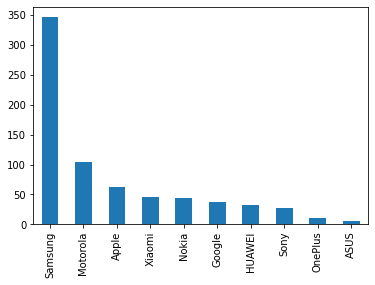

In [39]:
products['brand'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

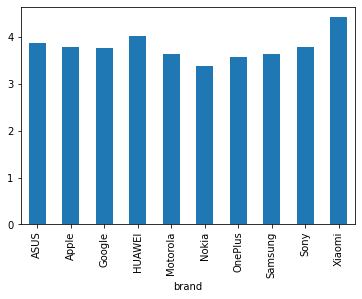

In [40]:
products.groupby('brand').mean()['rating'].plot(kind='bar')

We can see that Xiaomi has the hihgest average rating and Nokia has the lowest.

### 4.6 Display average price per brand

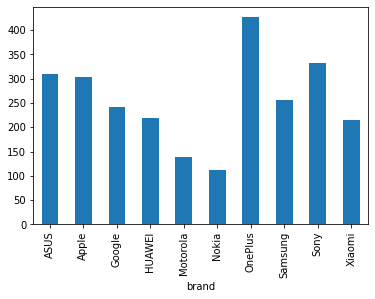

In [42]:
products.groupby('brand').mean()['price'].plot(kind='bar')

We can see that OnePlus is the costliest and Nokia is the cheapest.

### 4.7 Display average 'totalReviews' per brand

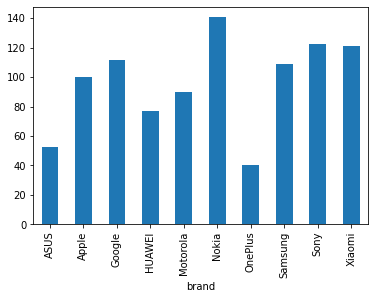

In [43]:
products.groupby('brand').mean()['totalReviews'].plot(kind='bar')

We can see that Nokia has the highest number of ratings and OnePlus has the lowest. This might be attributed to Nokia being one of the oldest brands and OnePlus being a relatively newer one.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [126]:
df = pd.merge(reviews,products,how='inner',on='asin')
df.shape

(67986, 14)

In [127]:
df.sample(5)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
8700,B00F2SKPIM,Vincent T.,5,"May 26, 2015",True,Simply the best phone.,"Dare I say, the best assistant available. Phon...",nan,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9000000,983,0.0000000,0.0000000
41802,B0775451TT,Eleonora,5,"May 22, 2019",True,Excelent love it si fast delivery and good pro...,Súper perfect quelity Excelent love it si fast...,nan,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-M...",3.9000000,436,479.0000000,749.9900000
49499,B07FM9913M,Claudio Gonzalez,5,"August 11, 2019",True,Muy buen teléfono.,"Funciona estupendamente, aunque la batería si ...",nan,Xiaomi,"Unlocked GOLD Xiaomi Mi A2, 4GB 64GB, Dual SIM...",4.2000000,453,159.4900000,0.0000000
51051,B07GV9J7X8,Like_shopping_Amazon,3,"September 21, 2019",False,F/DS is the international,amazon viewers. realize this. the F/DS is the ...,4.0000000,Samsung,Samsung Galaxy Note 9 SM-N960F/DS 512GB/8GB (M...,4.1000000,10,729.2900000,0.0000000
6747,B00D99ZBR6,Queyanna Guishard,4,"August 20, 2014",True,"Overall, It's A Great Phone",I enjoy this the Prevail II better than the Pr...,nan,Samsung,Samsung Galaxy Prevail II (Boost Mobile) (Disc...,3.5000000,314,89.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [128]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)

In [129]:
df.sample(5)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
8771,B00F2SKPIM,Joseph W.,5,"February 26, 2014",True,Amazing phone.,This phone isn't necessarily the phone for eve...,1.0000000,Samsung,"Samsung Galaxy Note 3, Black 32GB (Verizon Wir...",3.9000000,983,0.0000000,0.0000000
38878,B0753QKW5L,Mahaley Pershing,5,"June 2, 2018",True,Tablet is great!,"Wanted small tablet I can travel with to read,...",1.0000000,Samsung,Samsung Galaxy Tab E 8in 16GB 4G LTE AT&T Unlo...,2.9000000,22,114.5500000,0.0000000
25441,B01LEL8ABY,Amazon Customer,1,"August 3, 2018",True,"At 7 months of use, Battery lasts less than TW...","I was really happy with the product, until, by...",nan,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",3.0000000,305,0.0000000,0.0000000
57823,B07NVWSTHP,jonathan,5,"May 14, 2019",True,Excellent- Love this phone,Phone works well- Looks brand new. I love the ...,3.0000000,Motorola,Motorola Moto Z3 Play 32GB XT1929-3 Deep Indig...,5.0000000,2,149.9900000,0.0000000
59587,B07PY52GVP,brittany,5,"June 3, 2019",True,Definitely good quality,Definitely worth your money I love it.,1.0000000,Xiaomi,"Xiaomi Redmi Note 7, 64GB/4GB RAM, 6.30'' FHD+...",4.4000000,630,167.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [130]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [134]:
dff = df[df['verified'] == True]
# saving only the verified reviews

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

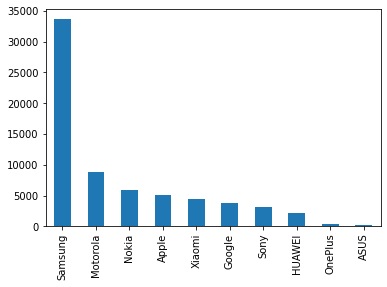

In [135]:
df['brand'].value_counts().plot(kind='bar')

Samsung is seen to have almost half of all the reviews in consideration. It is clearly the brand with the highest number of reviews!

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [136]:
dff = df[['brand','body','user_rating','review_title']]

In [137]:
dff.sample(5)

,brand,body,user_rating,review_title
40583,Google,I think Google's purchase of HTC allowed them ...,5,They get lots of fun Google extras that are fo...
32690,Apple,The phone works totally fine even outside the ...,5,Works pretty well in Brazil! And the phone loo...
31108,Apple,As described. Not a scratch.,5,Good
3356,Samsung,Its don't work good,1,One Star
63393,Samsung,"I bought this phone from ""Gotham Cell's"" and t...",1,My product was NOT NEW


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

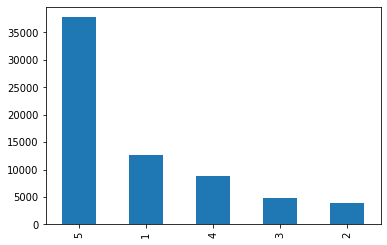

In [138]:
dff['user_rating'].value_counts().plot(kind='bar')

We can see that number of ratings with value as 5 is almost half of the total reviews received. This tells us that the sentiment analysis will be heavily biased towards the positive side.

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [139]:
conditions = [(dff['user_rating'] > 3),
              (dff['user_rating'] == 3),
              (dff['user_rating'] < 3)]
values = [1,0,-1]
dff['sentiment'] = np.select(conditions,values)
dff.sample(5)

,brand,body,user_rating,review_title,sentiment
8796,Samsung,All good,5,Five Stars,1
13092,Samsung,"good phone,one of my favorites for the notes",5,"good phone, one of my favorites for the",1
39055,Nokia,This phone is fine and works on T-Mobile. You'...,3,this is not a dumb phone,0
4144,Nokia,I just got my red Lumia 920 after it being bac...,5,Traded in my iPhone 4 for the Lumia 920,1
26353,Google,Good quality product and fast delivery.,5,Five Stars,1


In [140]:
# dff['sentiment'] = dff['user_rating'].apply(lambda x: 1 if x>3 else(0 if x==3 else(-1)))
# alternative approach

### 4.15 Check frequency distribution of the 'sentiment'

In [141]:
dff['sentiment'].value_counts()

 1    46576
-1    16658
 0     4752
Name: sentiment, dtype: int64

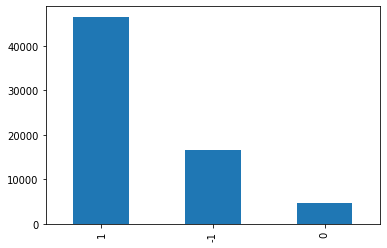

In [142]:
dff['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [143]:
pd.crosstab(dff['sentiment'],dff['brand']).T
# looking at brand-wise sentiments

sentiment,-1,0,1
brand,,,
ASUS,64,25,162
Apple,1434,322,3389
Google,1169,267,2351
HUAWEI,309,124,1792
Motorola,2104,653,6123
Nokia,1710,540,3665
OnePlus,52,13,282
Samsung,8537,2292,22800
Sony,770,280,2146


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [144]:
dff['body'].dtype

dtype('O')

'body' column is already in string format

In [145]:
dff['body'].head()
# before convert to lowercase

0    I had the Samsung A600 for awhile which is abs...
1    Due to a software issue between Nokia and Spri...
2    This is a great, reliable phone. I also purcha...
3    I love the phone and all, because I really did...
4    The phone has been great for every purpose it ...
Name: body, dtype: object

In [146]:
dff['body'] = dff['body'].astype('str').apply(lambda x: x.lower())

In [147]:
dff.sample(2)
# after convert to lowercase

,brand,body,user_rating,review_title,sentiment
63219,Samsung,the condition looked good. no major or highly ...,5,Phone looked good and works great,1
57596,Motorola,could not make or receive calls or texts. amaz...,1,Didn't work at all,-1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [148]:
dff['body'] = dff['body'].replace('[^\w\s]','',regex=True)

In [149]:
dff.sample(2)

,brand,body,user_rating,review_title,sentiment
1509,Samsung,this is the best first generation windows phon...,5,Excellent First Gen Windows Phone,1
43835,Sony,please help memy phone sucks bad photos bad ba...,1,The worst experience bad photos.,-1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [150]:
import nltk

In [151]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [153]:
dff['body'] = dff['body'].apply(lambda words: " ".join (word for word in words.split() if word not in stop))

In [154]:
dff.sample(2)

,brand,body,user_rating,review_title,sentiment
58481,Samsung,phone received brand new covered fingerprints ...,1,Not a new phone,-1
13568,Nokia,hello seller lumina purchased looking good sur...,2,The lumina i purchased from you is looking goo...,-1


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [155]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [156]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [157]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [102]:
# defning a function to tokenize each word in a sentence and then perform lemmatization on them
def lemmatize_text(text):
  out_text = [lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)]
  return out_text

In [158]:
dff['keywords'] = dff['body'].apply(lemmatize_text)
# applying the lemmatizer function and saving the output

In [159]:
dff.sample(2)

,brand,body,user_rating,review_title,sentiment,keywords
50024,Samsung,love new galaxy note 9 perfect size little big...,5,Works perfectly!,1,"[love, new, galaxy, note, 9, perfect, size, li..."
55257,Xiaomi,realmente muy buen equipo es lo que necesitaba...,5,"Muy buen celular, recomendable",1,"[realmente, muy, buen, equipo, e, lo, que, nec..."


In [160]:
dff['keywords'] = dff['keywords'].str.join(" ")

In [161]:
dff.sample(2)

,brand,body,user_rating,review_title,sentiment,keywords
30158,Samsung,wish buy item phone keep shut week using even ...,1,A bad product i wish i did not purchase,-1,wish buy item phone keep shut week using even ...
24158,Sony,messaging quit working,1,Don't Buy!,-1,messaging quit working


### 5.5 Write a function to check word frequency of the text

In [182]:
top_N = 20
word_dist = nltk.FreqDist(dff['keywords'])
print('All frequencies')
print('='*60)
wf=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])

print(wf)
print ('='*60)

All frequencies
             Word  Frequency
0            good        748
1     great phone        425
2            love        379
3           great        253
4      love phone        231
5       excellent        227
6       excelente        202
7      good phone        181
8         perfect        171
9                        146
10             ok        144
11           nice        143
12     work great        124
13     nice phone        114
14           like        108
15   good product        102
16  great product         98
17      muy bueno         74
18        awesome         69
19       excelent         69


### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [184]:
top_N = 20
word_dist = nltk.FreqDist(dff[dff['sentiment']==1]['keywords'])
print('All frequencies')
print('='*60)
wf=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(wf)
print ('='*60)

All frequencies
             Word  Frequency
0            good        692
1     great phone        424
2            love        375
3           great        252
4      love phone        231
5       excellent        227
6       excelente        202
7      good phone        174
8         perfect        171
9            nice        136
10                       129
11     work great        124
12             ok        120
13     nice phone        112
14           like        106
15   good product        100
16  great product         96
17      muy bueno         74
18       excelent         69
19        awesome         68


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
tfidf_vect = TfidfVectorizer()

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [164]:
X = tfidf_vect.fit_transform(dff['keywords'])

In [165]:
y = dff['sentiment']

### 5.9 Split the data into Train & Test Sets

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rf = RandomForestClassifier()

In [170]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
y_pred = rf.predict(X_test)

In [178]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [179]:
accuracy_score(y_test,y_pred)

0.8513924298882134

In [180]:
confusion_matrix(y_test,y_pred)

array([[ 3706,    10,  1269],
       [  444,   106,   896],
       [  410,     2, 13553]])

## 7. Write your conclusion

With the help of preprocessing steps, we were able to pass textual data into a RandomForestClassifier model. The model performed reasonably good without any tuning, and gave an accuracy score of about 85%